# 题目2：提取全部5页发布日热度的值，计算所有值的加和,并提交答案
## 中等难度

解题思路：  
1. 使用工具查看网络请求
2. 根据动态的内容找到解决方案
3. 运行测试py+js代码
4. 提交答案

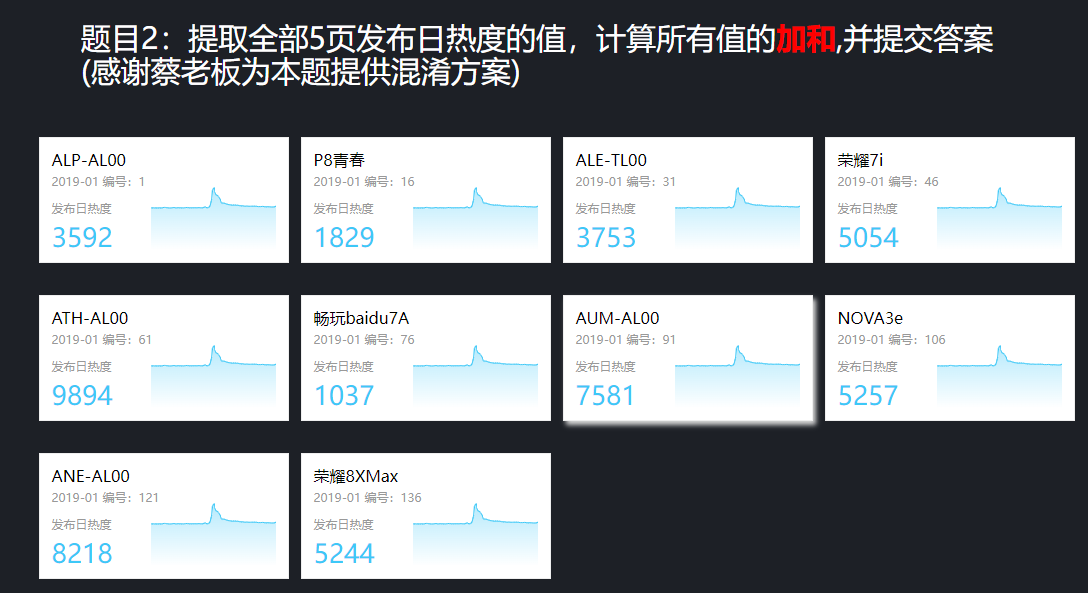

### 1. 使用工具查看网络请求
> 多次请求后发现cookie确实存在变动  
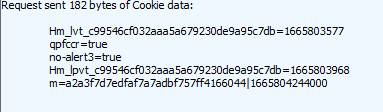  
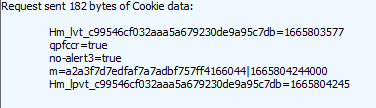  

> 查看代码没有set_cookie的值传递操作  
> 然后尝试Hook到cookie的变动位置（断点后输入easy_hook.js代码到console）  
> 解决掉一个无限debuger后hook到set_coockie  
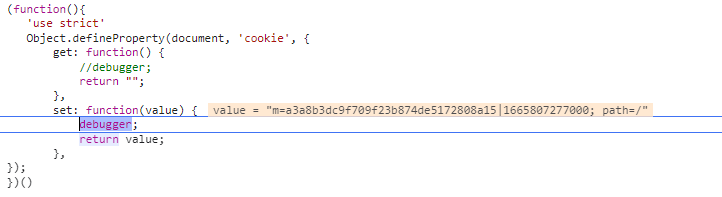

> 向上跟踪到具体位置，找到如下混淆代码，解析后其值为'coockie'  
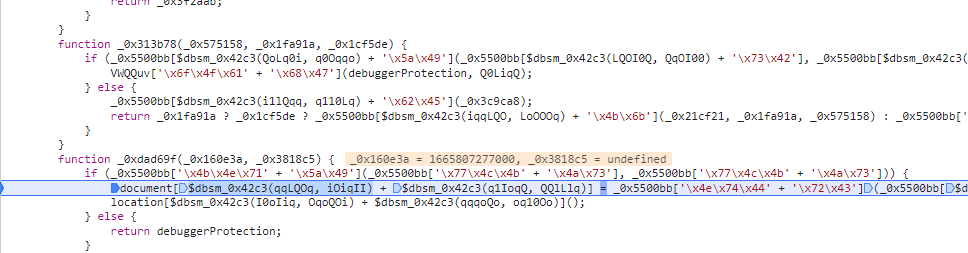  
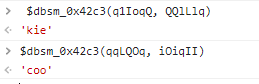

### 2. 根据动态内容跟踪修改
> 经过初步补环境处理后，得到`2-1.js`中的内容，发现进入蜜罐（指不同于正常执行的逻辑，被检测到后执行的另一套逻辑，在此为无限循环）
> 把`2-1.js`放入浏览器空白页中执行调试，跟踪找到蜜罐触发点，`2-2.js`
图片
> 此为格式化检测，用正则方式检测，触发蜜罐逻辑，简单修改后继续运行，发现报错，继续补环境得到`2-3.js`，再次进入蜜罐
> 将最后的代码块进行压缩（此后遇到蜜罐类同），继续补环境，直到报错`ReferenceError: navigator is not defined`
> 定义`navigator`后，继续补环境，没有报错，尝试输出`cookie`，报错，得到`2-4.js`
> 在关键代码之前运行`console.log`没有问题，在之后会得到错误，表明关键代码中重写了打印的语句
> 在关键代码前重新赋值`console`，然后再调用我们自己的方法指向`console`，然后输出`cookie`
> 因为之前写死了时间戳，现在尝试获取时间戳函数,最后将关键函数封装成函数，得到`match_2.js`